In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import jax.numpy as jnp
import jax.scipy as jsp
import jax as j
from matplotlib import pyplot as plt
from jax.experimental import checkify

j.devices('gpu')

[cuda(id=0)]

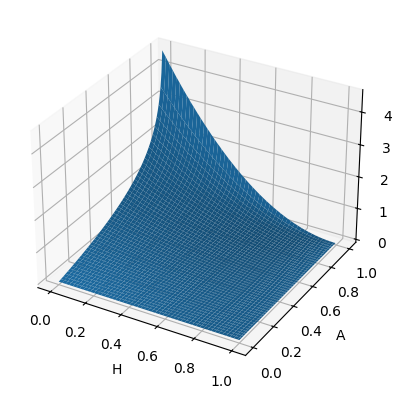

interactive(children=(IntSlider(value=30, description='angle', max=90, min=-30), FloatSlider(value=30.0, descr…

In [11]:
def focal(x: j.Array, y: j.Array, gamma=2):
    checkify.check((x>=0).all() * (x<=1).all(), 'x must be in [0, 1]')
    checkify.check((y>=0).all() * (y<=1).all(), 'y must be in [0, 1]')
    return  - (1 - x) ** gamma * jnp.log(1 - y)

focal = checkify.checkify(focal)
focal = j.jit(focal)

x = jnp.linspace(0, 1, 100, dtype=jnp.float16)
y = jnp.linspace(0, 1, 100, dtype=jnp.float16)
X, Y = jnp.meshgrid(x, y)

err, Z = focal(X, Y)
err.throw()

import numpy as np
X, Y, Z = (np.array(A) for A in (X, Y, Z))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('H')
ax.set_ylabel('A')

from IPython.display import display
import ipywidgets as widgets

@widgets.interact(angls=(0, 360, 1), elevation=(0, 90, 0.5))
def update(angle=30, elevation=30):
    ax.view_init(elev=elevation, azim=angle)
    display(fig)

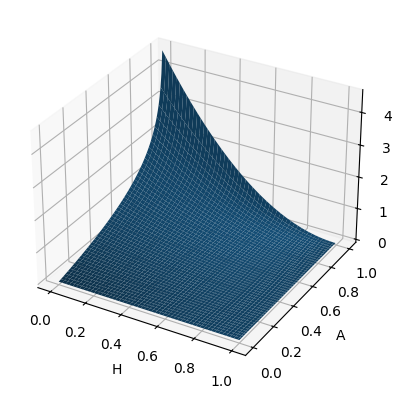

interactive(children=(IntSlider(value=30, description='angle', max=90, min=-30), FloatSlider(value=30.0, descr…

In [15]:

def focal_heatmap_loss(h, a, gamma=2.0):
    return - (1 - h)**gamma * torch.log(1 - a)

x = torch.linspace(0, 1, 100)
y = torch.linspace(0, 1, 100)
X, Y = torch.meshgrid(x, y)


Z = focal_heatmap_loss(X, Y)

import numpy as np
X, Y, Z = (A.numpy() for A in (X, Y, Z))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('H')
ax.set_ylabel('A')

from IPython.display import display
import ipywidgets as widgets

@widgets.interact(angls=(0, 360, 1), elevation=(0, 90, 0.5))
def update(angle=30, elevation=30):
    ax.view_init(elev=elevation, azim=angle)
    display(fig)